In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="R8BsHBpga4t91VEUaAn0")
project = rf.workspace("pdiproject").project("pdi_project")
version = project.version(1)
dataset = version.download("yolov11")
                

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.2 MB/s eta 0:00:00a 0:00:01
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
loading Roboflow workspace...
loading Roboflow project...


⬇️ Descargando Dataset desde Roboflow...
loading Roboflow workspace...
loading Roboflow project...
✅ Dataset descargado en: /kaggle/working/PDI_Project-1
🚀 Iniciando entrenamiento...
Ultralytics 8.3.236 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/PDI_Project-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n

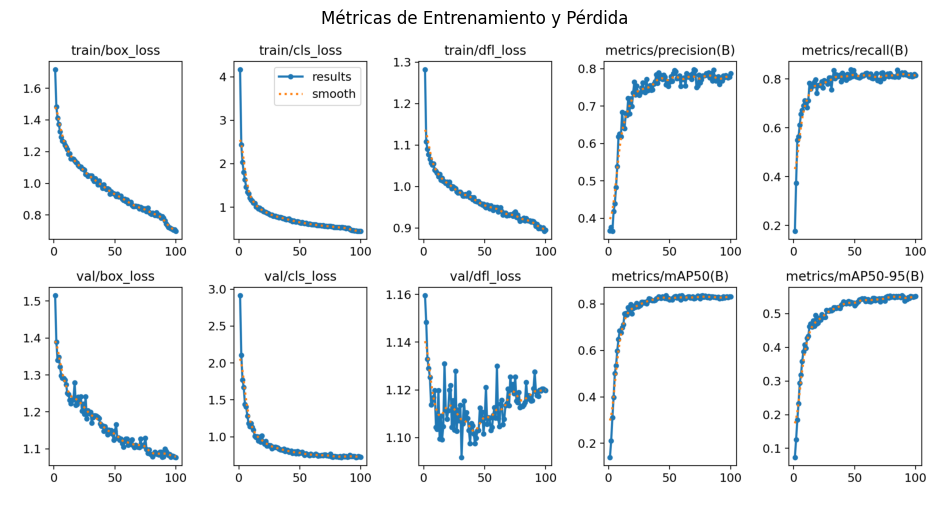


--- 🟦 MATRIZ DE CONFUSIÓN ---


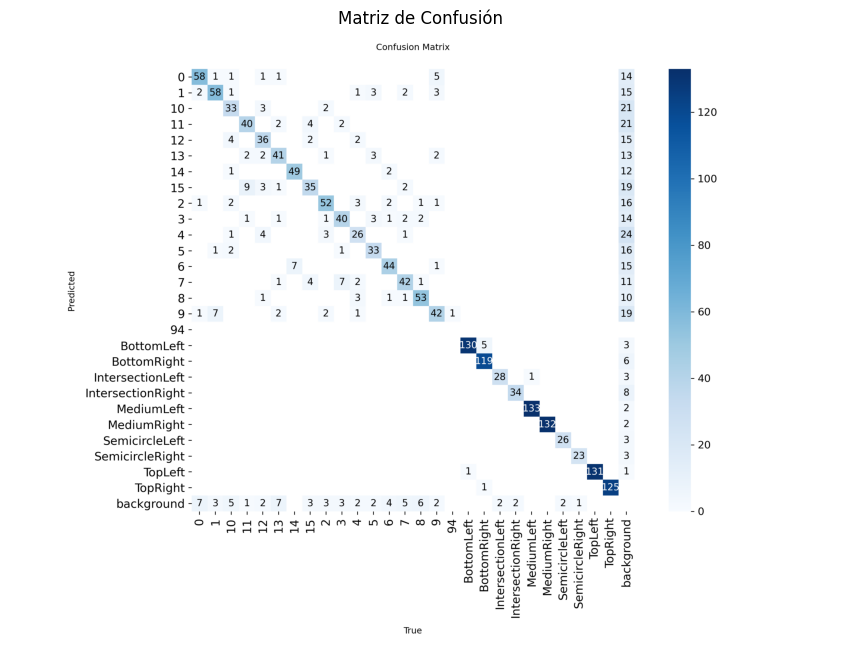


--- 🖼️ EJEMPLO DE PREDICCIONES EN VALIDACIÓN ---


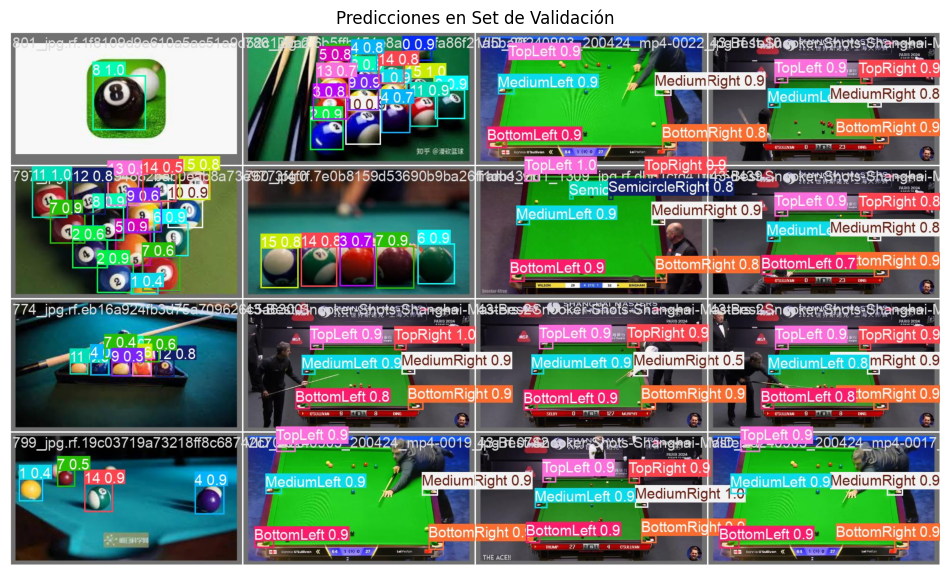


📦 Preparando descarga del modelo...
  adding: kaggle/working/runs/detect/mi_entrenamiento_pdi/ (stored 0%)
  adding: kaggle/working/runs/detect/mi_entrenamiento_pdi/confusion_matrix_normalized.png (deflated 12%)
  adding: kaggle/working/runs/detect/mi_entrenamiento_pdi/weights/ (stored 0%)
  adding: kaggle/working/runs/detect/mi_entrenamiento_pdi/weights/last.pt (deflated 9%)
  adding: kaggle/working/runs/detect/mi_entrenamiento_pdi/weights/best.pt (deflated 9%)
  adding: kaggle/working/runs/detect/mi_entrenamiento_pdi/args.yaml (deflated 53%)
  adding: kaggle/working/runs/detect/mi_entrenamiento_pdi/train_batch8732.jpg (deflated 12%)
  adding: kaggle/working/runs/detect/mi_entrenamiento_pdi/train_batch0.jpg (deflated 5%)
  adding: kaggle/working/runs/detect/mi_entrenamiento_pdi/val_batch1_pred.jpg (deflated 6%)
  adding: kaggle/working/runs/detect/mi_entrenamiento_pdi/results.png (deflated 8%)
  adding: kaggle/working/runs/detect/mi_entrenamiento_pdi/results.csv (deflated 63%)
  addi

/kaggle/working/modelo_completo.zip

In [1]:
# --- 1. INSTALACIÓN DE DEPENDENCIAS ---
# Suprimimos el output (-q) para mantener la limpieza, pero aseguramos las librerías necesarias
!pip install roboflow ultralytics -q

import os
import glob
from ultralytics import YOLO
from roboflow import Roboflow
from IPython.display import Image, display, FileLink
import matplotlib.pyplot as plt
import cv2

# --- 2. DESCARGA DEL DATASET (Tu código) ---
print("⬇️ Descargando Dataset desde Roboflow...")
rf = Roboflow(api_key="R8BsHBpga4t91VEUaAn0") # Nota: Tu API key es visible aquí
project = rf.workspace("pdiproject").project("pdi_project")
version = project.version(1)
dataset = version.download("yolov8")

print(f"✅ Dataset descargado en: {dataset.location}")

# --- 3. ENTRENAMIENTO COMPLETO ---
# Usamos YOLOv8 'nano' (n) para rapidez o 'medium' (m) para mayor precisión.
# Recomendación: Usar 'yolov8m.pt' si tienes GPU P100.
print("🚀 Iniciando entrenamiento...")

model = YOLO('yolov8n.pt')  # Carga un modelo pre-entrenado

# Entrenamos.
# epochs=100: Un buen número para asegurar convergencia.
# patience=20: Detiene el entrenamiento si no mejora tras 20 épocas.
# plots=True: Genera las gráficas que necesitamos.
results = model.train(
    data=f"{dataset.location}/data.yaml",
    epochs=100,
    imgsz=640,
    patience=20,
    batch=16,
    plots=True,
    name='mi_entrenamiento_pdi' # Nombre de la carpeta de salida
)

# --- 4. VALIDACIÓN Y MÉTRICAS ---
print("📊 Validando el modelo y generando métricas...")
metrics = model.val()

# --- 5. VISUALIZACIÓN DE RESULTADOS EN EL NOTEBOOK ---
# Función para mostrar imágenes generadas por YOLO
def mostrar_imagen(ruta_imagen, titulo):
    if os.path.exists(ruta_imagen):
        img = cv2.imread(ruta_imagen)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(12, 8))
        plt.imshow(img)
        plt.title(titulo)
        plt.axis('off')
        plt.show()
    else:
        print(f"⚠️ No se encontró la imagen: {ruta_imagen}")

# Ruta donde YOLO guarda los resultados
output_dir = '/kaggle/working/runs/detect/mi_entrenamiento_pdi'

print("\n--- 📉 GRÁFICAS DE ENTRENAMIENTO (Pérdida y Precisión) ---")
mostrar_imagen(f'{output_dir}/results.png', 'Métricas de Entrenamiento y Pérdida')

print("\n--- 🟦 MATRIZ DE CONFUSIÓN ---")
# YOLOv8 a veces guarda como confusion_matrix.png o confusion_matrix_normalized.png
mostrar_imagen(f'{output_dir}/confusion_matrix.png', 'Matriz de Confusión')

print("\n--- 🖼️ EJEMPLO DE PREDICCIONES EN VALIDACIÓN ---")
# Muestra el primer batch de validación con predicciones
val_batch = glob.glob(f'{output_dir}/val_batch0_pred*.jpg')[0]
mostrar_imagen(val_batch, 'Predicciones en Set de Validación')

# --- 6. EXPORTAR Y DESCARGAR ---
print("\n📦 Preparando descarga del modelo...")
# Comprimimos la carpeta del entrenamiento para descargar todo (gráficas + pesos)
!zip -r modelo_completo.zip /kaggle/working/runs/detect/mi_entrenamiento_pdi

print("✅ ¡Listo! Descarga tu archivo abajo:")
display(FileLink(r'modelo_completo.zip'))

In [ ]:
# #!/usr/bin/env python3
# """
# train_raw_detector.py
# Detector desde 0 en PyTorch (raw). 
# Formato de etiquetas: YOLO (class x_center y_center w h) normalizados [0..1].
# Salida multi-escala (3 heads). Loss: BCE obj + BCE cls + CIoU vectorizado.
# Incluye NMS para inferencia.
# """

# import os
# import glob
# from pathlib import Path
# import random
# from typing import List, Tuple

# import cv2
# import numpy as np
# from tqdm import tqdm

# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# from torch.utils.data import Dataset, DataLoader

# # -------------------------
# # Utilities: box conversions
# # -------------------------
# def xywh_to_xyxy_torch(xywh):
#     # xywh: (...,4) in normalized coords
#     x, y, w, h = xywh.unbind(-1)
#     x1 = x - w / 2
#     y1 = y - h / 2
#     x2 = x + w / 2
#     y2 = y + h / 2
#     return torch.stack([x1, y1, x2, y2], dim=-1)

# def xyxy_to_xywh_torch(xyxy):
#     x1, y1, x2, y2 = xyxy.unbind(-1)
#     w = (x2 - x1).clamp(min=1e-6)
#     h = (y2 - y1).clamp(min=1e-6)
#     cx = x1 + w/2
#     cy = y1 + h/2
#     return torch.stack([cx, cy, w, h], dim=-1)

# def bbox_iou_torch(box1, box2, eps=1e-9):
#     # box1: (...,4) xyxy ; box2: (...,4) xyxy broadcastable
#     x1 = torch.max(box1[...,0], box2[...,0])
#     y1 = torch.max(box1[...,1], box2[...,1])
#     x2 = torch.min(box1[...,2], box2[...,2])
#     y2 = torch.min(box1[...,3], box2[...,3])

#     inter_w = (x2 - x1).clamp(min=0)
#     inter_h = (y2 - y1).clamp(min=0)
#     inter = inter_w * inter_h

#     area1 = (box1[...,2]-box1[...,0]).clamp(min=0) * (box1[...,3]-box1[...,1]).clamp(min=0)
#     area2 = (box2[...,2]-box2[...,0]).clamp(min=0) * (box2[...,3]-box2[...,1]).clamp(min=0)
#     union = area1 + area2 - inter + eps
#     return inter / union

# def bbox_ciou_torch(pred_xyxy, target_xyxy, eps=1e-9):
#     # pred_xyxy & target_xyxy: (...,4) normalized xyxy
#     iou = bbox_iou_torch(pred_xyxy, target_xyxy, eps=eps)

#     # centers
#     px = (pred_xyxy[...,0] + pred_xyxy[...,2]) / 2
#     py = (pred_xyxy[...,1] + pred_xyxy[...,3]) / 2
#     gx = (target_xyxy[...,0] + target_xyxy[...,2]) / 2
#     gy = (target_xyxy[...,1] + target_xyxy[...,3]) / 2
#     center_dist2 = (px - gx)**2 + (py - gy)**2

#     # enclose box
#     ex1 = torch.min(pred_xyxy[...,0], target_xyxy[...,0])
#     ey1 = torch.min(pred_xyxy[...,1], target_xyxy[...,1])
#     ex2 = torch.max(pred_xyxy[...,2], target_xyxy[...,2])
#     ey2 = torch.max(pred_xyxy[...,3], target_xyxy[...,3])
#     c2 = (ex2 - ex1)**2 + (ey2 - ey1)**2 + eps

#     # aspect ratio
#     pw = (pred_xyxy[...,2] - pred_xyxy[...,0]).clamp(min=eps)
#     ph = (pred_xyxy[...,3] - pred_xyxy[...,1]).clamp(min=eps)
#     gw = (target_xyxy[...,2] - target_xyxy[...,0]).clamp(min=eps)
#     gh = (target_xyxy[...,3] - target_xyxy[...,1]).clamp(min=eps)
#     v = (4 / (np.pi**2)) * (torch.atan(gw/gh) - torch.atan(pw/ph))**2
#     alpha = v / (1.0 - iou + v + eps)

#     ciou = iou - (center_dist2 / c2) - alpha * v
#     return ciou

# # -------------------------
# # Letterbox / image utils
# # -------------------------
# def letterbox(img, new_size=640, color=(114,114,114)):
#     h0, w0 = img.shape[:2]
#     if isinstance(new_size, int):
#         new_w = new_h = new_size
#     else:
#         new_w, new_h = new_size
#     scale = min(new_w / w0, new_h / h0)
#     nw = int(round(w0 * scale))
#     nh = int(round(h0 * scale))
#     img_resized = cv2.resize(img, (nw, nh), interpolation=cv2.INTER_LINEAR)
#     canvas = np.full((new_h, new_w, 3), color, dtype=np.uint8)
#     dw = (new_w - nw) // 2
#     dh = (new_h - nh) // 2
#     canvas[dh:dh+nh, dw:dw+nw, :] = img_resized
#     return canvas, scale, dw, dh

# # -------------------------
# # Dataset reader (YOLO labels)
# # -------------------------
# class YoloDataset(Dataset):
#     def __init__(self, images_dir, labels_dir, img_size=640, augment=False):
#         self.img_paths = sorted(glob.glob(os.path.join(images_dir, "*.*")))
#         self.labels_dir = labels_dir
#         self.img_size = img_size
#         self.augment = augment

#     def __len__(self):
#         return len(self.img_paths)

#     def load_labels(self, stem):
#         path = os.path.join(self.labels_dir, f"{stem}.txt")
#         boxes = []
#         if os.path.exists(path):
#             with open(path, 'r') as f:
#                 for line in f.read().strip().splitlines():
#                     if not line: continue
#                     parts = line.split()
#                     if len(parts) < 5: continue
#                     cls = int(parts[0])
#                     x = float(parts[1]); y = float(parts[2]); w = float(parts[3]); h = float(parts[4])
#                     boxes.append([cls, x, y, w, h])
#         return np.array(boxes, dtype=np.float32) if len(boxes) > 0 else np.zeros((0,5), dtype=np.float32)

#     def __getitem__(self, idx):
#         img_path = self.img_paths[idx]
#         stem = Path(img_path).stem
#         img = cv2.imread(img_path)
#         assert img is not None, f"Cannot read {img_path}"
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         labels = self.load_labels(stem)  # (N,5)

#         # simple augmentation: horizontal flip
#         if self.augment and random.random() < 0.5:
#             # FIX: Use cv2.flip. It is safer for memory layout than img[:, ::-1, :]
#             img = cv2.flip(img, 1) 
            
#             if labels.shape[0] > 0:
#                 labels[:,1] = 1.0 - labels[:,1]

#         # letterbox calls cv2.resize, which requires contiguous memory
#         img_l, scale, dw, dh = letterbox(img, self.img_size)
#         img_l = img_l.astype(np.float32) / 255.0
        
#         img_t = torch.from_numpy(img_l).permute(2,0,1).contiguous()

#         labels_t = torch.from_numpy(labels)
#         return img_t, labels_t

#     def __getitem__(self, idx):
#         img_path = self.img_paths[idx]
#         stem = Path(img_path).stem
#         img = cv2.imread(img_path)
#         assert img is not None, f"Cannot read {img_path}"
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         labels = self.load_labels(stem)  # (N,5)

#         # simple augmentation: horizontal flip
#         if self.augment and random.random() < 0.5:
#             img = img[:, ::-1, :]  # Esto crea strides negativos
#             img = np.ascontiguousarray(img) # <--- AGREGA ESTA LÍNEA (FIX 1)
            
#             if labels.shape[0] > 0:
#                 labels[:,1] = 1.0 - labels[:,1]

#         img_l, scale, dw, dh = letterbox(img, self.img_size)
#         img_l = img_l.astype(np.float32) / 255.0
        
#         # FIX 2 (Seguridad extra): Asegurar contigüidad antes de torch.from_numpy
#         img_l = np.ascontiguousarray(img_l) 
        
#         img_t = torch.from_numpy(img_l).permute(2,0,1).contiguous()

#         # labels remain normalized relative to original image...
#         labels_t = torch.from_numpy(labels)
#         return img_t, labels_t

# def collate_fn(batch):
#     imgs = [b[0] for b in batch]
#     labels = [b[1] for b in batch]
#     imgs = torch.stack(imgs, 0)
#     return imgs, labels  # labels is a list of tensors (variable length)

# # -------------------------
# # Model (backbone + 3 heads)
# # -------------------------
# class ConvBNAct(nn.Module):
#     def __init__(self, in_ch, out_ch, k=3, s=1):
#         super().__init__()
#         p = k//2
#         self.conv = nn.Conv2d(in_ch, out_ch, k, stride=s, padding=p, bias=False)
#         self.bn = nn.BatchNorm2d(out_ch)
#         self.act = nn.SiLU()

#     def forward(self, x):
#         return self.act(self.bn(self.conv(x)))

# class SimpleBackbone(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.stem = ConvBNAct(3, 32, k=3, s=1)
#         self.layer1 = nn.Sequential(ConvBNAct(32,64,k=3,s=2), ConvBNAct(64,64))
#         self.layer2 = nn.Sequential(ConvBNAct(64,128,k=3,s=2), ConvBNAct(128,128), ConvBNAct(128,128))
#         self.layer3 = nn.Sequential(ConvBNAct(128,256,k=3,s=2), ConvBNAct(256,256), ConvBNAct(256,256))
#         self.layer4 = nn.Sequential(ConvBNAct(256,512,k=3,s=2), ConvBNAct(512,512))

#     def forward(self, x):
#         x = self.stem(x)   # /1
#         x1 = self.layer1(x) # /2
#         x2 = self.layer2(x1) # /4
#         x3 = self.layer3(x2) # /8
#         x4 = self.layer4(x3) # /16
#         return x2, x3, x4  # return multi-scale features

# class DetectHead(nn.Module):
#     def __init__(self, in_ch, num_anchors, num_classes):
#         super().__init__()
#         self.conv = ConvBNAct(in_ch, in_ch, k=3)
#         self.pred = nn.Conv2d(in_ch, num_anchors * (5 + num_classes), kernel_size=1)

#     def forward(self, x):
#         x = self.conv(x)
#         return self.pred(x)

# class RawDetector(nn.Module):
#     def __init__(self, num_classes=2, anchors=None):
#         super().__init__()
#         if anchors is None:
#             # anchors: fractions relative to image (w,h)
#             anchors = [
#                 [(0.03,0.04),(0.07,0.06),(0.12,0.10)],  # small (for 1/4 grid)
#                 [(0.18,0.20),(0.30,0.28),(0.45,0.40)],  # medium (1/8)
#                 [(0.9,1.0),(1.6,1.5),(2.6,2.4)]         # large (1/16)
#             ]
#         self.anchors = anchors
#         self.num_classes = num_classes
#         self.na = len(anchors[0])
#         self.backbone = SimpleBackbone()
#         self.head_s = DetectHead(128, len(anchors[0]), num_classes)
#         self.head_m = DetectHead(256, len(anchors[1]), num_classes)
#         self.head_l = DetectHead(512, len(anchors[2]), num_classes)

#     def forward(self, x):
#         f_s, f_m, f_l = self.backbone(x)   # B, C, Hs, Ws etc
#         p_s = self.head_s(f_s)
#         p_m = self.head_m(f_m)
#         p_l = self.head_l(f_l)
#         return [p_s, p_m, p_l]

# # -------------------------
# # Build targets (vectorized-ish)
# # -------------------------
# def build_targets_tensor(preds, labels_list, anchors, img_size):
#     """
#     preds: list of tensors [B, A*(5+nc), H, W]
#     labels_list: list length B, each (N,5) numpy/tensor [cls,x,y,w,h] normalized
#     anchors: list per scale of (w,h) fractions
#     Returns target tensors per scale: list of (B, A, H, W, 5+nc)
#     """
#     device = preds[0].device
#     B = preds[0].shape[0]
#     nc = preds[0].shape[1] // len(anchors[0]) - 5
#     t_list = []
#     for p, anc in zip(preds, anchors):
#         _, CA, H, W = p.shape
#         A = len(anc)
#         t = torch.zeros((B, A, H, W, 5 + nc), device=device, dtype=torch.float32)
#         t_list.append(t)

#     for b in range(B):
#         labels = labels_list[b]
#         if isinstance(labels, torch.Tensor):
#             labels = labels.cpu().numpy()
#         if labels.shape[0] == 0:
#             continue
#         for gt in labels:
#             cls, gx, gy, gw, gh = float(gt[0]), float(gt[1]), float(gt[2]), float(gt[3]), float(gt[4])
#             # choose best anchor by ratio (simple heuristic)
#             best_scale = None
#             best_a = None
#             best_diff = 1e9
#             for si, anc_list in enumerate(anchors):
#                 for ai, (aw, ah) in enumerate(anc_list):
#                     # compare log ratio
#                     diff = abs(np.log((gw + 1e-9)/(aw + 1e-9))) + abs(np.log((gh + 1e-9)/(ah + 1e-9)))
#                     if diff < best_diff:
#                         best_diff = diff
#                         best_scale = si
#                         best_a = ai
#             p = preds[best_scale]
#             _,_,Hs,Ws = p.shape
#             gi = int(gx * Ws)
#             gj = int(gy * Hs)
#             if gi < 0 or gi >= Ws or gj < 0 or gj >= Hs:
#                 continue
#             t = t_list[best_scale]
#             # objectness
#             t[b, best_a, gj, gi, 0] = 1.0
#             # tx,ty relative to cell
#             t[b, best_a, gj, gi, 1] = gx * Ws - gi
#             t[b, best_a, gj, gi, 2] = gy * Hs - gj
#             # w,h relative to grid (we store in pixel-grid units)
#             t[b, best_a, gj, gi, 3] = gw * Ws
#             t[b, best_a, gj, gi, 4] = gh * Hs
#             # one-hot class
#             t[b, best_a, gj, gi, 5 + int(cls)] = 1.0
#     return t_list

# # -------------------------
# # Loss (vectorized where possible)
# # -------------------------
# def compute_loss(preds, targets_list, anchors, img_size, lambda_obj=1.0, lambda_box=5.0, lambda_cls=1.0):
#     """
#     preds: list of raw preds [B, A*(5+nc), H, W]
#     targets_list: list len B of (N,5) arrays/tensors
#     anchors: as defined
#     """
#     device = preds[0].device
#     B = preds[0].shape[0]
#     nc = preds[0].shape[1] // len(anchors[0]) - 5
#     t_list = build_targets_tensor(preds, targets_list, anchors, img_size)

#     bce_obj = nn.BCEWithLogitsLoss(reduction='sum')
#     bce_cls = nn.BCEWithLogitsLoss(reduction='sum')

#     loss_obj = torch.tensor(0.0, device=device)
#     loss_box = torch.tensor(0.0, device=device)
#     loss_cls = torch.tensor(0.0, device=device)

#     for p, t, anc in zip(preds, t_list, anchors):
#         Bp, CA, H, W = p.shape
#         A = len(anc)
#         # reshape pred to B,A,H,W,5+nc
#         p_view = p.view(Bp, A, 5 + nc, H, W).permute(0,1,3,4,2).contiguous()
#         # objectness
#         pred_obj = p_view[...,0]
#         tgt_obj = t[...,0]
#         loss_obj = loss_obj + bce_obj(pred_obj, tgt_obj) * lambda_obj

#         # coordinates
#         # pred tx,ty -> sigmoid; tw,th -> linear
#         pred_tx_ty = torch.sigmoid(p_view[...,1:3])
#         pred_tw_th = p_view[...,3:5]  # raw
#         tgt_tx_ty = t[...,1:3]
#         tgt_tw_th = t[...,3:5]

#         mask = tgt_obj > 0.5  # positions with objects
#         if mask.sum() > 0:
#             # prepare index arrays
#             # get predicted absolute coords normalized to image [0..1]
#             # For each scale the grid dims are HxW. We compute absolute normalized centers:
#             grid_x = (torch.arange(W, device=device).float().view(1,1,1,W))
#             grid_y = (torch.arange(H, device=device).float().view(1,1,H,1))
#             # pred center normalized:
#             px = (pred_tx_ty[...,0] + grid_x) / W
#             py = (pred_tx_ty[...,1] + grid_y) / H
#             # pred wh normalized:
#             pw = (pred_tw_th[...,0]) / W
#             ph = (pred_tw_th[...,1]) / H
#             pred_xywh = torch.stack([px, py, pw, ph], dim=-1)  # B,A,H,W,4
#             pred_xyxy = xywh_to_xyxy_torch(pred_xywh)

#             # tgt center normalized:
#             gx = (t[...,1] + grid_x) / W
#             gy = (t[...,2] + grid_y) / H
#             gw = (t[...,3]) / W
#             gh = (t[...,4]) / H
#             tgt_xywh = torch.stack([gx, gy, gw, gh], dim=-1)
#             tgt_xyxy = xywh_to_xyxy_torch(tgt_xywh)

#             # gather masked predictions/targets
#             mask_idx = mask.unsqueeze(-1).expand_as(pred_xyxy)  # B,A,H,W,4
#             pred_sel = pred_xyxy[mask_idx].view(-1,4)
#             tgt_sel = tgt_xyxy[mask_idx].view(-1,4)

#             # CIoU loss
#             ciou = bbox_ciou_torch(pred_sel, tgt_sel)  # (Npos,)
#             loss_box = loss_box + ((1.0 - ciou).sum() * lambda_box)

#             # class loss (one-hot BCE)
#             pred_cls = p_view[...,5:]  # logits
#             tgt_cls = t[...,5:]
#             pred_cls_pos = pred_cls[mask]
#             tgt_cls_pos = tgt_cls[mask]
#             if pred_cls_pos.numel() > 0:
#                 loss_cls = loss_cls + bce_cls(pred_cls_pos, tgt_cls_pos) * lambda_cls

#     total_loss = (loss_obj + loss_box + loss_cls) / max(1.0, B)
#     return total_loss, loss_obj.detach(), loss_box.detach(), loss_cls.detach()

# # -------------------------
# # NMS for inference
# # -------------------------
# def non_max_suppression(preds, anchors, conf_thres=0.25, iou_thres=0.45, max_det=300):
#     """
#     preds: list of preds [B, A*(5+nc), H, W]
#     returns detections per image: list of tensors (N,6) -> [x1,y1,x2,y2,conf,cls]
#     """
#     device = preds[0].device
#     B = preds[0].shape[0]
#     nc = preds[0].shape[1] // len(anchors[0]) - 5

#     dets_batch = [[] for _ in range(B)]

#     for scale_idx, p in enumerate(preds):
#         Bp, CA, H, W = p.shape
#         A = len(anchors[scale_idx])
#         p = p.view(Bp, A, 5 + nc, H, W).permute(0,1,3,4,2).contiguous()  # B,A,H,W,5+nc

#         # compute centers normalized
#         grid_x = (torch.arange(W, device=device).float().view(1,1,1,W))
#         grid_y = (torch.arange(H, device=device).float().view(1,1,H,1))

#         obj_logits = p[...,0]
#         conf = torch.sigmoid(obj_logits)
#         mask = conf > conf_thres
#         if mask.sum() == 0:
#             continue

#         tx_ty = torch.sigmoid(p[...,1:3])
#         tw_th = p[...,3:5]
#         cls_logits = p[...,5:]

#         px = (tx_ty[...,0] + grid_x) / W
#         py = (tx_ty[...,1] + grid_y) / H
#         pw = torch.abs(tw_th[...,0]) / W
#         ph = torch.abs(tw_th[...,1]) / H

#         # loop over batch images but vectorized per image
#         for b in range(Bp):
#             m = mask[b]  # A,H,W boolean
#             if m.sum() == 0:
#                 continue
#             # get tensors where mask true
#             idxs = m.nonzero(as_tuple=False)  # (K,3) -> (a, y, x)
#             a_idx = idxs[:,0]; y_idx = idxs[:,1]; x_idx = idxs[:,2]
#             conf_vals = conf[b][a_idx, y_idx, x_idx]
#             px_vals = px[b][a_idx, y_idx, x_idx]
#             py_vals = py[b][a_idx, y_idx, x_idx]
#             pw_vals = pw[b][a_idx, y_idx, x_idx]
#             ph_vals = ph[b][a_idx, y_idx, x_idx]
#             cls_logits_vals = cls_logits[b][a_idx, y_idx, x_idx]  # K,nc
#             cls_prob = torch.sigmoid(cls_logits_vals)
#             # top class per detection
#             cls_conf, cls_idx = torch.max(cls_prob, dim=1)
#             final_conf = conf_vals * cls_conf
#             # build xyxy
#             x1 = (px_vals - pw_vals/2).clamp(0,1)
#             y1 = (py_vals - ph_vals/2).clamp(0,1)
#             x2 = (px_vals + pw_vals/2).clamp(0,1)
#             y2 = (py_vals + ph_vals/2).clamp(0,1)
#             boxes = torch.stack([x1,y1,x2,y2], dim=1)
#             # apply nms per class
#             for cls_ in cls_idx.unique():
#                 mask_cls = cls_idx == cls_
#                 if mask_cls.sum() == 0: continue
#                 boxes_c = boxes[mask_cls]
#                 scores_c = final_conf[mask_cls]
#                 keep = torchvision_nms(boxes_c, scores_c, iou_thres)
#                 kept_boxes = boxes_c[keep]
#                 kept_scores = scores_c[keep]
#                 kept_cls = torch.full((kept_boxes.shape[0],1), float(cls_), device=device)
#                 for i in range(kept_boxes.shape[0]):
#                     x1,y1,x2,y2 = kept_boxes[i].tolist()
#                     confv = kept_scores[i].item()
#                     clsid = int(kept_cls[i].item())
#                     dets_batch[b].append([x1,y1,x2,y2,confv,clsid])
#     # convert lists to tensors
#     out = []
#     for b in range(B):
#         if len(dets_batch[b]) == 0:
#             out.append(torch.zeros((0,6)))
#         else:
#             out.append(torch.tensor(dets_batch[b], dtype=torch.float32))
#     return out

# def torchvision_nms(boxes, scores, iou_threshold):
#     """
#     Simple NMS using torchvision.ops.nms if available.
#     If torchvision is not installed, fallback to a pure PyTorch CPU NMS.
#     """
#     try:
#         from torchvision.ops import nms
#         return nms(boxes, scores, iou_threshold)
#     except Exception:
#         # ---- Fallback NMS (CPU implementation) ----
#         if boxes.numel() == 0:
#             return torch.zeros((0,), dtype=torch.long)

#         b = boxes.cpu().numpy()
#         s = scores.cpu().numpy()

#         x1 = b[:, 0]
#         y1 = b[:, 1]
#         x2 = b[:, 2]
#         y2 = b[:, 3]

#         areas = (x2 - x1) * (y2 - y1)
#         order = s.argsort()[::-1]

#         keep = []

#         while order.size > 0:
#             i = order[0]
#             keep.append(i)

#             xx1 = np.maximum(x1[i], x1[order[1:]])
#             yy1 = np.maximum(y1[i], y1[order[1:]])
#             xx2 = np.minimum(x2[i], x2[order[1:]])
#             yy2 = np.minimum(y2[i], y2[order[1:]])

#             w = np.maximum(0.0, xx2 - xx1)
#             h = np.maximum(0.0, yy2 - yy1)
#             inter = w * h

#             IoU = inter / (areas[i] + areas[order[1:]] - inter + 1e-9)

#             inds = np.where(IoU <= iou_threshold)[0]
#             order = order[inds + 1]

#         return torch.tensor(keep, dtype=torch.long, device=boxes.device)



# # -------------------------
# # Training loop (raw)
# # -------------------------
# def train(train_loader, val_loader, model, anchors, device, epochs=50, lr=1e-3, img_size=640, save_dir="runs_raw"):
#     os.makedirs(save_dir, exist_ok=True)
#     model.to(device)
#     opt = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=5e-4)
#     sched = torch.optim.lr_scheduler.CosineAnnealingLR(opt, T_max=epochs)
#     best_val = 1e9

#     for epoch in range(epochs):
#         model.train()
#         running_loss = 0.0
#         loop = tqdm(train_loader, desc=f"Train E{epoch+1}/{epochs}")
#         for imgs, labels in loop:
#             imgs = imgs.to(device)
#             # labels: list of variable tensors
#             targets_list = [lab.to(device) for lab in labels]

#             preds = model(imgs)
#             loss, l_obj, l_box, l_cls = compute_loss(preds, targets_list, anchors, img_size)
#             opt.zero_grad()
#             loss.backward()
#             opt.step()

#             running_loss += loss.item()
#             loop.set_postfix({'loss': running_loss/(loop.n+1), 'lobj': float(l_obj), 'lbox': float(l_box), 'lcls': float(l_cls)})

#         sched.step()

#         # validation (loss-based)
#         model.eval()
#         val_loss = 0.0
#         with torch.no_grad():
#             for imgs, labels in val_loader:
#                 imgs = imgs.to(device)
#                 targets_list = [lab.to(device) for lab in labels]
#                 preds = model(imgs)
#                 loss, _, _, _ = compute_loss(preds, targets_list, anchors, img_size)
#                 val_loss += loss.item()
#         val_loss = val_loss / max(1, len(val_loader))
#         print(f"Epoch {epoch+1} -> train_loss: {running_loss/len(train_loader):.4f}, val_loss: {val_loss:.4f}")

#         # checkpoint
#         torch.save({'epoch': epoch+1, 'model': model.state_dict(), 'opt': opt.state_dict()}, os.path.join(save_dir, f"ckpt_epoch{epoch+1}.pth"))
#         if val_loss < best_val:
#             best_val = val_loss
#             torch.save(model.state_dict(), os.path.join(save_dir, "best.pth"))
#             print("Saved best model.")

# # -------------------------
# # Inference helper
# # -------------------------
# def inference_image(img_path, model, device, img_size=640, conf_thres=0.25, iou_thres=0.45):
#     model.eval()
#     img = cv2.imread(img_path)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img_l, _, _, _ = letterbox(img, img_size)
#     img_t = torch.from_numpy(img_l.astype(np.float32)/255.0).permute(2,0,1).unsqueeze(0).to(device)
#     with torch.no_grad():
#         preds = model(img_t)
#         dets = non_max_suppression(preds, model.anchors, conf_thres=conf_thres, iou_thres=iou_thres)
#         return dets[0]  # tensor (N,6) normalized coords

# # -------------------------
# # Main
# # -------------------------
# def main():
#     # USER CONFIG - adjust paths and params
#     train_images = "/kaggle/working/PDI_Project-1/train/images"
#     train_labels = "/kaggle/working/PDI_Project-1/train/labels"
#     val_images = "/kaggle/working/PDI_Project-1/valid/images"
#     val_labels = "/kaggle/working/PDI_Project-1/valid/labels"
#     img_size = 640
#     num_classes = 27
#     epochs = 40
#     batch_size = 8
#     lr = 1e-3
#     device = "cuda" if torch.cuda.is_available() else "cpu"
#     save_dir = "runs_raw"

#     anchors = [
#         [(0.03,0.04),(0.07,0.06),(0.12,0.10)],
#         [(0.18,0.20),(0.30,0.28),(0.45,0.40)],
#         [(0.9,1.0),(1.6,1.5),(2.6,2.4)]
#     ]

#     train_ds = YoloDataset(train_images, train_labels, img_size=img_size, augment=True)
#     val_ds = YoloDataset(val_images, val_labels, img_size=img_size, augment=False)
#     train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, collate_fn=collate_fn, num_workers=4, pin_memory=True)
#     val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False, collate_fn=collate_fn, num_workers=2, pin_memory=True)

#     model = RawDetector(num_classes=num_classes, anchors=anchors)
#     print("Model parameters:", sum(p.numel() for p in model.parameters()))
#     train(train_loader, val_loader, model, anchors, device, epochs=epochs, lr=lr, img_size=img_size, save_dir=save_dir)

#     # example inference (adjust path)
#     # dets = inference_image("dataset/val/images/example.jpg", model, device, img_size=img_size)
#     # print("Detections:", dets)

# if __name__ == "__main__":
#     main()
